# Predicting Income For Subsidy using logistic Regression

In [1]:
import sklearn

In [2]:
#importing package
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix 

In [3]:
data_inc = pd.read_csv('income(1) (2).csv')

In [4]:
data_inc.size

415714

In [5]:
data_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [6]:
data = data_inc.copy()

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [8]:
#variables are properly and expected datatypes

In [9]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [10]:
#no missing data

In [11]:
summary_num = data.describe() 

In [12]:
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [13]:
summary_cat = data.describe(include= "O") #includes object

In [14]:
print(summary_cat)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [15]:
data['JobType'].value_counts()#counts frequency

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [16]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [17]:
np.unique(data['JobType'])#hence specail character occured

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [18]:
data = pd.read_csv('income(1) (2).csv',na_values=[" ?"])#replcing ? as na

In [19]:
## pre processing

In [20]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [21]:
#after changing ? as nan missing values occurred in jobtype and occupation

In [22]:
missing = data[data.isnull().any(axis=1)]

In [23]:
print(missing)

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

In [24]:
"""points to note
1.missing values in jobtype = 1809
2.missing value in occupation = 1816
3.since occupation missing jobtype also missing but 1816-1809 = 7 
hence,there are still 7 rows because jobtype is never worked"""

'points to note\n1.missing values in jobtype = 1809\n2.missing value in occupation = 1816\n3.since occupation missing jobtype also missing but 1816-1809 = 7 \nhence,there are still 7 rows because jobtype is never worked'

In [25]:
data2 = data.dropna(axis=0)#removing missing value 

In [26]:
cor = data2.corr()

In [27]:
print(cor)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


In [28]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [29]:
gender = pd.crosstab(index = data2['gender'],columns='count',normalize = True)

In [30]:
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [31]:
gender_salsat = pd.crosstab(index = data2['gender'],columns = data2['SalStat'],
                           margins=True,normalize='index')

In [32]:
print(gender_salsat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


C:\Users\mohammed rafik m\Downloads\New folder\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


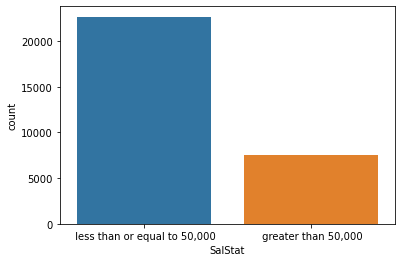

In [33]:
salstat = sns.countplot(data2['SalStat'])#barplot for salstatus

C:\Users\mohammed rafik m\Downloads\New folder\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

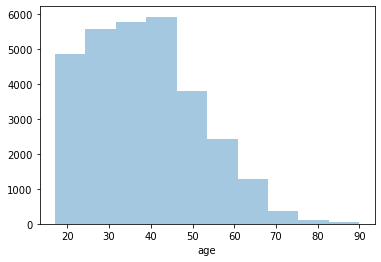

In [34]:
sns.distplot(data2['age'],bins=10,kde=False)

In [35]:
#age 20-45 high in frequency

In [36]:
#to check how salary is affect age we use boxplot bivariant

C:\Users\mohammed rafik m\Downloads\New folder\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

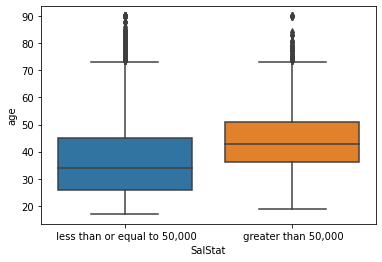

In [37]:
sns.boxplot('SalStat','age',data= data2)
data2.groupby('SalStat')['age'].median()

In [38]:
#logistic regression is a ml algorithm that predict the probability of catergorical dependent variable

<AxesSubplot:xlabel='age', ylabel='SalStat'>

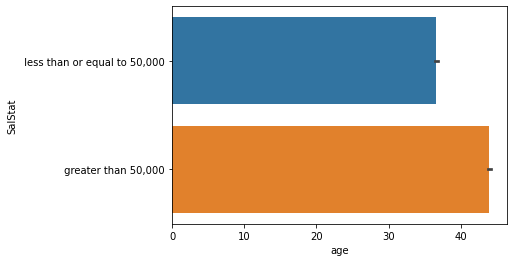

In [39]:
sns.barplot(x='age',y='SalStat',data=data2)

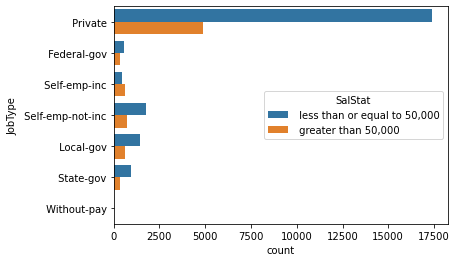

In [40]:
JobType = sns.countplot(y=data2['JobType'],hue = 'SalStat', data=data2)

In [41]:
job_salstat = pd.crosstab(index=data2['JobType'],columns=data2['SalStat'],margins=True,normalize='index')

In [42]:
#salstat is category so hence channge to int using map


In [43]:
print(data2['SalStat'])

0         less than or equal to 50,000
1         less than or equal to 50,000
2                  greater than 50,000
3         less than or equal to 50,000
4         less than or equal to 50,000
                     ...              
31973     less than or equal to 50,000
31974     less than or equal to 50,000
31975     less than or equal to 50,000
31976     less than or equal to 50,000
31977     less than or equal to 50,000
Name: SalStat, Length: 30162, dtype: object


C:\Users\mohammed rafik m\Downloads\New folder\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalgain'>

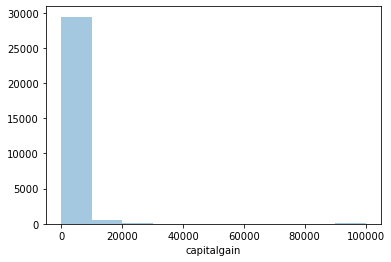

In [44]:
sns.distplot(data2['capitalgain'], bins = 10, kde = False)


<AxesSubplot:xlabel='capitalloss'>

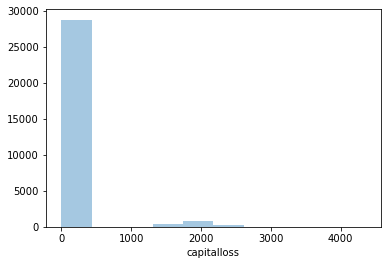

In [45]:
sns.distplot(data2['capitalloss'], bins = 10, kde = False)


In [46]:
#logistic regression

In [47]:
#chaning catergory to int

In [48]:
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


C:\Users\mohammed rafik m\AppData\Local\Temp\ipykernel_6480\784685041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [49]:
data2['SalStat'].value_counts()

0    22654
1     7508
Name: SalStat, dtype: int64

In [50]:
new_data =pd.get_dummies(data2,drop_first = True)

In [51]:
new_data.head()

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
columns_list=list(new_data.columns)
print(columns_list)



['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [53]:
# Separating the input names from data
features=list(set(columns_list)-set(['SalStat']))
print(features)

['nativecountry_ Vietnam', 'JobType_ Local-gov', 'nativecountry_ Philippines', 'EdType_ 12th', 'EdType_ Masters', 'JobType_ Private', 'nativecountry_ France', 'EdType_ Prof-school', 'nativecountry_ Holand-Netherlands', 'gender_ Male', 'race_ White', 'JobType_ Self-emp-inc', 'race_ Black', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ 1st-4th', 'EdType_ Some-college', 'nativecountry_ Columbia', 'nativecountry_ Honduras', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'nativecountry_ South', 'occupation_ Sales', 'race_ Other', 'nativecountry_ Jamaica', 'relationship_ Not-in-family', 'EdType_ 7th-8th', 'occupation_ Craft-repair', 'relationship_ Own-child', 'nativecountry_ Canada', 'nativecountry_ Cuba', 'capitalgain', 'nativecountry_ Scotland', 'nativecountry_ Dominican-Republic', 'nativecountry_ United-States', 'nativecountry_ Ecuador', 'nativecountry_ Nicaragua', 'maritalstatus_ Separated', 'nativecountry_ Puerto-Rico', 'relationship_ Wife', 'maritalstatus_ Never-married', 'nativecountry_

In [54]:
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [55]:
x = new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [56]:
print(x.shape)  # Check the shape of the feature matrix
print(y.shape)  # Check the shape of the target variable


(30162, 94)
(30162,)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Make sure x and y are correctly defined with data

# Initialize a logistic regression model
model = LogisticRegression()

# Initialize an empty list to store accuracy scores
accuracy_scores = []

# Perform logistic regression for 15 iterations
for i in range(15):
    # Split the data into training and testing sets (adjust sizes as needed)
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=i)
    
    # Train the model on the training data
    model.fit(train_x, train_y)
    
    # Make predictions on the test data
    predictions = model.predict(test_x)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(test_y, predictions)
    accuracy_scores.append(accuracy)

# Print the accuracy scores for each iteration
for i, score in enumerate(accuracy_scores):
    print(f'Iteration {i + 1} - Accuracy: {score:.2%}')


C:\Users\mohammed rafik m\Downloads\New folder\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mohammed rafik m\Downloads\New folder\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Iteration 1 - Accuracy: 83.66%
Iteration 2 - Accuracy: 84.22%
Iteration 3 - Accuracy: 84.09%
Iteration 4 - Accuracy: 84.09%
Iteration 5 - Accuracy: 84.24%
Iteration 6 - Accuracy: 84.64%
Iteration 7 - Accuracy: 84.16%
Iteration 8 - Accuracy: 84.85%
Iteration 9 - Accuracy: 83.43%
Iteration 10 - Accuracy: 83.91%
Iteration 11 - Accuracy: 84.13%
Iteration 12 - Accuracy: 83.99%
Iteration 13 - Accuracy: 84.37%
Iteration 14 - Accuracy: 84.22%
Iteration 15 - Accuracy: 84.09%


C:\Users\mohammed rafik m\Downloads\New folder\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Make sure x and y are correctly defined with data

# Initialize empty lists to store accuracy scores and losses
accuracy_scores = []
losses = []  # Define a list to store your custom loss values

# Perform Logistic Regression classification for 20 iterations
for i in range(20):
    # Split the data into training and testing sets (adjust sizes as needed)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)

    # Initialize a Logistic Regression classifier
    lr_model = LogisticRegression()

    # Train the model on the training data
    lr_model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = lr_model.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)

    # You need to define your custom loss function and calculate loss
    # Here's an example using mean squared error as a loss function
    # Replace this with your specific loss function
    loss = ((y_test - predictions) ** 2).mean()
    losses.append(loss)

# Print the accuracy scores and losses for each iteration
for i, (score, loss) in enumerate(zip(accuracy_scores, losses)):
    print(f'Iteration {i + 1} - Accuracy: {score:.2%} - Loss: {loss:.4f}')


C:\Users\mohammed rafik m\Downloads\New folder\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mohammed rafik m\Downloads\New folder\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Iteration 1 - Accuracy: 83.66% - Loss: 0.1634
Iteration 2 - Accuracy: 84.22% - Loss: 0.1578
Iteration 3 - Accuracy: 84.09% - Loss: 0.1591
Iteration 4 - Accuracy: 84.09% - Loss: 0.1591
Iteration 5 - Accuracy: 84.24% - Loss: 0.1576
Iteration 6 - Accuracy: 84.64% - Loss: 0.1536
Iteration 7 - Accuracy: 84.16% - Loss: 0.1584
Iteration 8 - Accuracy: 84.85% - Loss: 0.1515
Iteration 9 - Accuracy: 83.43% - Loss: 0.1657
Iteration 10 - Accuracy: 83.91% - Loss: 0.1609
Iteration 11 - Accuracy: 84.13% - Loss: 0.1587
Iteration 12 - Accuracy: 83.99% - Loss: 0.1601
Iteration 13 - Accuracy: 84.37% - Loss: 0.1563
Iteration 14 - Accuracy: 84.22% - Loss: 0.1578
Iteration 15 - Accuracy: 84.09% - Loss: 0.1591
Iteration 16 - Accuracy: 83.90% - Loss: 0.1610
Iteration 17 - Accuracy: 84.32% - Loss: 0.1568
Iteration 18 - Accuracy: 83.82% - Loss: 0.1618
Iteration 19 - Accuracy: 84.01% - Loss: 0.1599
Iteration 20 - Accuracy: 84.15% - Loss: 0.1585


C:\Users\mohammed rafik m\Downloads\New folder\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
logistic = LogisticRegression()

In [60]:
logistic.fit(train_x,train_y)

C:\Users\mohammed rafik m\Downloads\New folder\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
logistic.coef_

array([[-5.39885617e-02, -6.28400727e-01, -6.80333863e-02,
        -2.04276756e-01,  7.78023682e-01, -3.13475892e-01,
         4.41632234e-03,  5.88888493e-01, -1.63074691e-03,
         2.57445587e-01, -3.81120315e-01,  1.64146197e-01,
        -6.98699690e-01, -4.00347146e-01, -1.17696850e-01,
        -1.58454487e-01, -3.53487179e-01, -6.46523659e-02,
        -3.99770501e-03, -1.74515438e-02, -8.03057752e-02,
         3.50615446e-01, -1.94671933e-01, -4.30199019e-02,
        -4.09160628e-01, -6.26635292e-01, -1.48079050e-01,
        -1.37570787e+00,  2.02291709e-03, -1.35936128e-02,
         3.28787339e-04, -1.71979571e-03, -7.20102240e-02,
        -1.98723181e-01, -1.15416719e-02, -3.30817750e-02,
        -2.88305280e-01, -8.29612837e-02,  4.02370865e-01,
        -1.37702435e+00, -2.49300931e-02, -1.99701477e-02,
        -1.45930367e-02,  4.76719877e-02,  1.12078765e+00,
        -7.98314691e-01,  1.66696570e-03, -6.64869591e-01,
         4.73580169e-01,  1.09455694e+00, -2.02982546e-0

In [62]:
logistic.intercept_

array([-1.91670813])

In [63]:
prediction = logistic.predict(test_x)
print(prediction)

[0 0 1 ... 0 0 0]


In [64]:
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

[[6230  548]
 [ 892 1379]]


In [65]:
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)

0.8408663940766935


In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(test_y, prediction)

# Calculate recall
recall = recall_score(test_y, prediction)

# Calculate F1-score
f1 = f1_score(test_y, prediction)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.7156201349247535
Recall: 0.6072214883311317
F1-score: 0.6569795140543117
